### Exploration

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import random
import arviz as az
import aesara.tensor as at
import scipy.stats as sts

In [5]:
df = pd.read_csv('WorldHappiness_Corruption_2015_2020.csv')
df.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


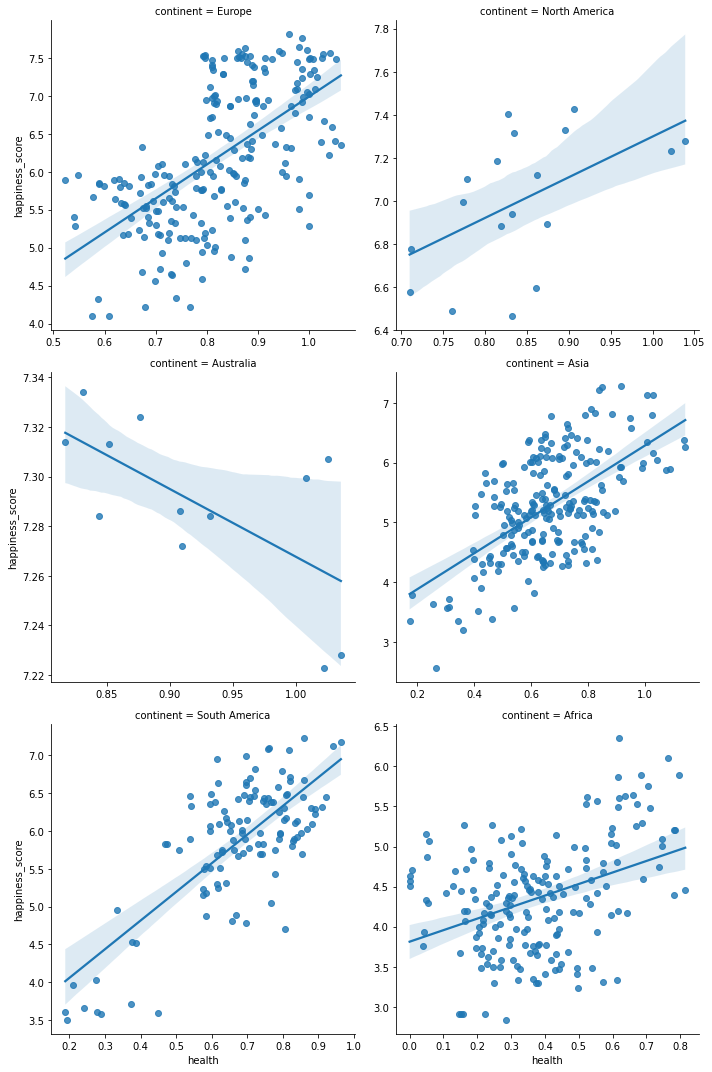

In [6]:
sns.lmplot(x = 'health', y = 'happiness_score', data = df, fit_reg = 'false', col = 'continent', 
           facet_kws=dict(sharex=False, sharey=False), col_wrap = 2)
plt.show()

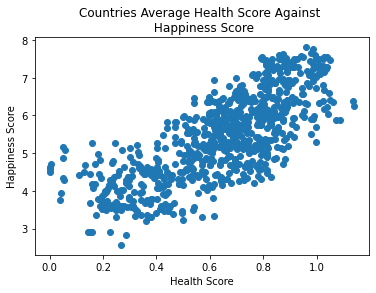

In [7]:
health = df['health']
happiness = df['happiness_score']

plt.scatter(health, happiness)
plt.xlabel('Health Score')
plt.ylabel('Happiness Score')
plt.title('Countries Average Health Score Against \n Happiness Score')
plt.show()

### Normal Homoscedastic

In [8]:
degrees = range(1, 4)
norm_inference = []

for degree in degrees:
    with pm.Model() as norm_model:
        
        x = pm.MutableData('x', health)
        y = pm.MutableData('y', happiness)

        # priors
        a = pm.Normal('a', mu = 0, sigma = 5)
        b = pm.Normal('b', mu = 0, sigma = 5, shape = degree)
        sigma = pm.HalfNormal('sigma', sigma = 5)
        
        # deterministic mu for each degree
        mu = a
        for i in range(0, degree):
            mu = mu + b[i] * x ** (i+1)
        mu = pm.Deterministic('mu', mu)

        # likelihood
        likelihood = pm.Normal('likelihood', mu = mu, sigma = sigma, observed = happiness)
        
        # sampling
        inference = pm.sample(2000, tune = 2000)
        norm_post = pm.sample_posterior_predictive(inference, extend_inferencedata = True)
        norm_inference.append(norm_post)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, sigma]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 37 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, sigma]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 75 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, sigma]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 186 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,3.108,0.078,2.954,3.246,0.001,0.001,2709.0,3539.0,1.0
b[0],3.647,0.113,3.431,3.852,0.002,0.002,2667.0,3458.0,1.0
sigma,0.741,0.018,0.708,0.777,0.000,0.000,4143.0,3601.0,1.0


array([<AxesSubplot:title={'center':'a'}, xlabel='Rank (all chains)', ylabel='Chain'>,
       <AxesSubplot:title={'center':'b\n0'}, xlabel='Rank (all chains)', ylabel='Chain'>,
       <AxesSubplot:title={'center':'sigma'}, xlabel='Rank (all chains)', ylabel='Chain'>],
      dtype=object)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,3.688,0.140,3.422,3.951,0.003,0.002,1940.0,2991.0,1.0
b[0],1.256,0.493,0.330,2.187,0.012,0.008,1776.0,2599.0,1.0
b[1],2.043,0.410,1.271,2.813,0.009,0.007,1888.0,2789.0,1.0
sigma,0.730,0.018,0.695,0.765,0.000,0.000,3776.0,3732.0,1.0


array([<AxesSubplot:title={'center':'a'}, xlabel='Rank (all chains)', ylabel='Chain'>,
       <AxesSubplot:title={'center':'b\n0'}, xlabel='Rank (all chains)', ylabel='Chain'>,
       <AxesSubplot:title={'center':'b\n1'}, xlabel='Rank (all chains)', ylabel='Chain'>,
       <AxesSubplot:title={'center':'sigma'}, xlabel='Rank (all chains)', ylabel='Chain'>],
      dtype=object)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,4.317,0.185,3.986,4.666,0.004,0.003,1912.0,2773.0,1.0
b[0],-3.754,1.110,-5.962,-1.766,0.029,0.020,1505.0,1918.0,1.0
b[1],12.171,2.074,8.376,16.194,0.054,0.038,1476.0,1701.0,1.0
b[2],-5.891,1.188,-8.116,-3.641,0.030,0.021,1540.0,1818.0,1.0
sigma,0.715,0.018,0.682,0.749,0.000,0.000,3074.0,3465.0,1.0


array([[<AxesSubplot:title={'center':'a'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'b\n0'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'b\n1'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<AxesSubplot:title={'center':'b\n2'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'sigma'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:>]], dtype=object)

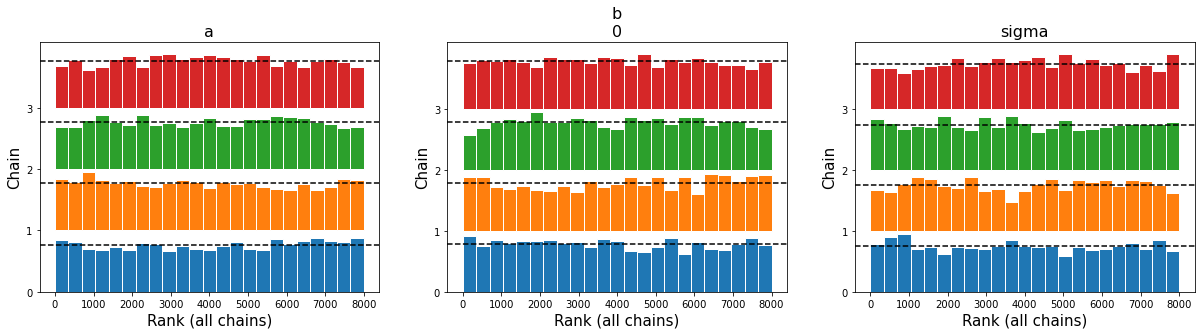

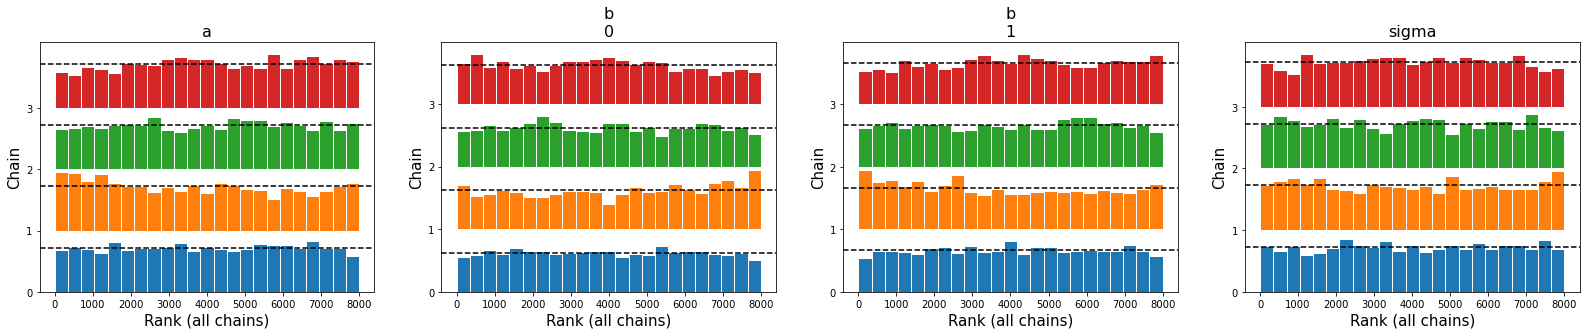

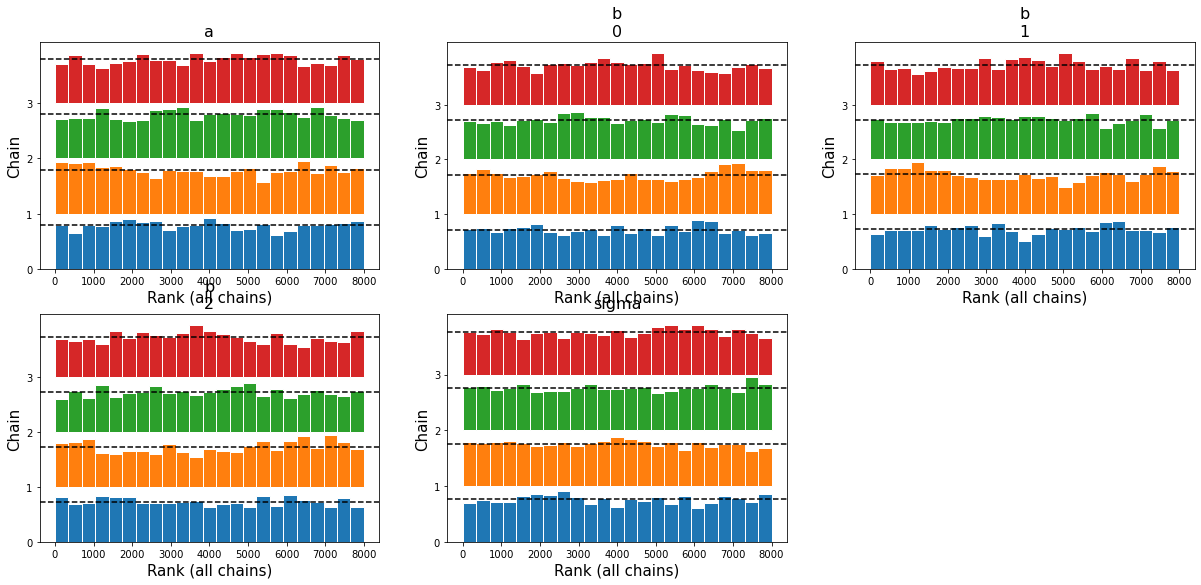

In [9]:
var_bar_mu = ['~mu']
for i in range(len(norm_inference)):
    display(az.summary(norm_inference[i], var_bar_mu))
    display(az.plot_rank(norm_inference[i], var_bar_mu))

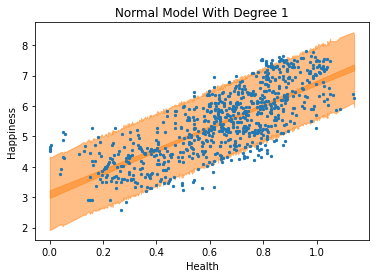

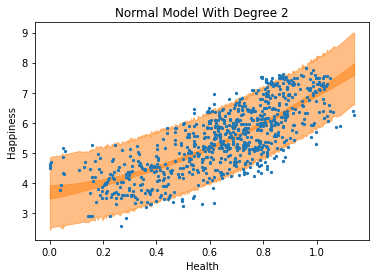

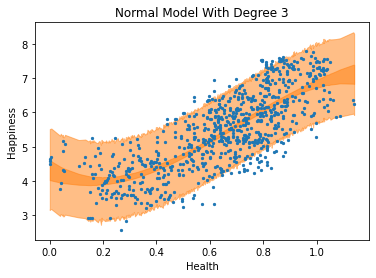

In [10]:
for i in range(len(norm_inference)):
    ax = az.plot_hdi(health, norm_inference[i].posterior['mu'], smooth = False, hdi_prob = 0.89)
    az.plot_hdi(health, norm_inference[i].posterior_predictive['likelihood'], ax = ax, smooth = False, hdi_prob = 0.89)
    plt.scatter(health, happiness, s = 5)
    plt.title(f'Normal Model With Degree {i+1}')
    plt.xlabel('Health')
    plt.ylabel('Happiness')
    plt.show()

### Normal Heteroscedastic

In [11]:
degrees = range(1, 4)
norm_inference_hetero = []

for degree in degrees:
    with pm.Model() as norm_model_hetero:

        x = pm.MutableData('x', health)
        y = pm.MutableData('y', happiness)
        
        # priors
        a = pm.Normal('a', mu = 0, sigma = 5)
        b = pm.Normal('b', mu = 0, sigma = 5, shape = degree)
        c = pm.Normal('c', sigma = 5)
        d = pm.Normal('d', sigma = 5, shape = degree)
        
        # deterministic mu and sigma for each degree
        mu = a
        sigma = c
        
        for i in range(0, degree):
            mu = mu + b[i] * x ** (i+1)
            sigma = sigma + d[i] * x ** (i+1)
            
        mu = pm.Deterministic('mu', mu)
        sigma = pm.Deterministic('sigma', sigma)

        # likelihood
        likelihood = pm.Normal('likelihood', mu = mu, sigma = sigma, observed = y)

        # sampling
        inference = pm.sample(2000, tune = 2000, target_accept = 0.9)
        norm_post = pm.sample_posterior_predictive(inference, extend_inferencedata = True)
        norm_inference_hetero.append(norm_post)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, c, d]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 48 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, c, d]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 109 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, c, d]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 361 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,3.108,0.081,2.951,3.252,0.001,0.001,3141.0,3522.0,1.0
b[0],3.646,0.118,3.419,3.863,0.002,0.002,3015.0,3465.0,1.0
c,0.735,0.051,0.640,0.830,0.001,0.001,2818.0,3237.0,1.0
d[0],0.012,0.074,-0.126,0.149,0.001,0.001,2866.0,3491.0,1.0


array([<AxesSubplot:title={'center':'a'}, xlabel='Rank (all chains)', ylabel='Chain'>,
       <AxesSubplot:title={'center':'b\n0'}, xlabel='Rank (all chains)', ylabel='Chain'>,
       <AxesSubplot:title={'center':'c'}, xlabel='Rank (all chains)', ylabel='Chain'>,
       <AxesSubplot:title={'center':'d\n0'}, xlabel='Rank (all chains)', ylabel='Chain'>],
      dtype=object)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,3.755,0.145,3.487,4.033,0.003,0.002,1937.0,1884.0,1.0
b[0],0.912,0.534,-0.138,1.844,0.013,0.010,1807.0,1793.0,1.0
b[1],2.375,0.454,1.550,3.239,0.010,0.007,1905.0,1866.0,1.0
c,0.675,0.093,0.508,0.854,0.002,0.001,2112.0,2683.0,1.0
d[0],-0.135,0.335,-0.769,0.473,0.008,0.005,1971.0,2355.0,1.0
d[1],0.303,0.289,-0.218,0.848,0.006,0.005,2137.0,2692.0,1.0


array([[<AxesSubplot:title={'center':'a'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'b\n0'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'b\n1'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<AxesSubplot:title={'center':'c'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'d\n0'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'d\n1'}, xlabel='Rank (all chains)', ylabel='Chain'>]],
      dtype=object)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,4.416,0.164,4.092,4.710,0.003,0.002,2355.0,2349.0,1.0
b[0],-4.514,1.020,-6.387,-2.560,0.023,0.017,1923.0,2014.0,1.0
b[1],13.697,1.942,9.742,17.088,0.045,0.032,1897.0,2095.0,1.0
b[2],-6.788,1.131,-8.998,-4.693,0.025,0.018,2009.0,2273.0,1.0
c,0.582,0.135,0.342,0.839,0.003,0.002,2289.0,2421.0,1.0
d[0],-0.358,0.849,-1.988,1.179,0.019,0.015,2131.0,2164.0,1.0
d[1],1.727,1.578,-1.186,4.751,0.034,0.027,2175.0,2055.0,1.0
d[2],-1.230,0.893,-2.966,0.394,0.019,0.014,2277.0,2158.0,1.0


array([[<AxesSubplot:title={'center':'a'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'b\n0'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'b\n1'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'b\n2'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<AxesSubplot:title={'center':'c'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'d\n0'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'d\n1'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'d\n2'}, xlabel='Rank (all chains)', ylabel='Chain'>]],
      dtype=object)

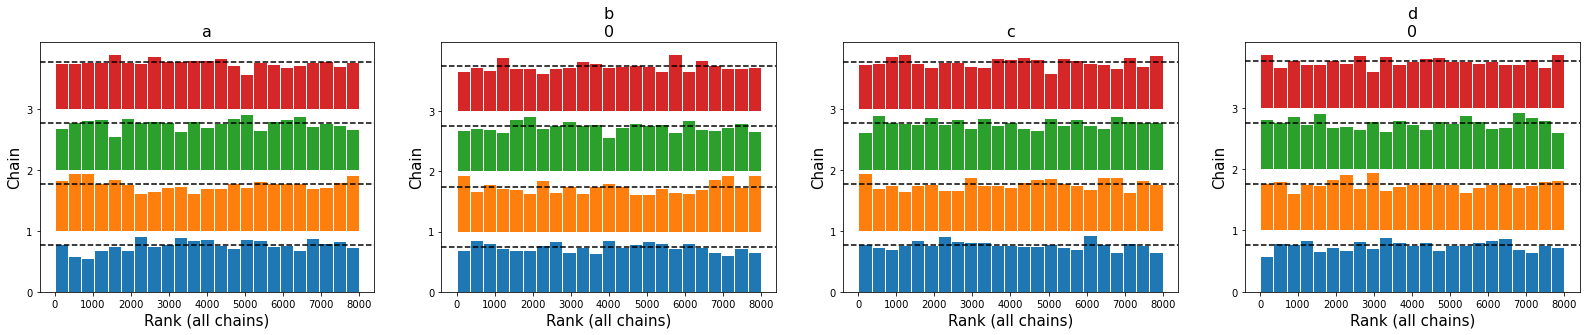

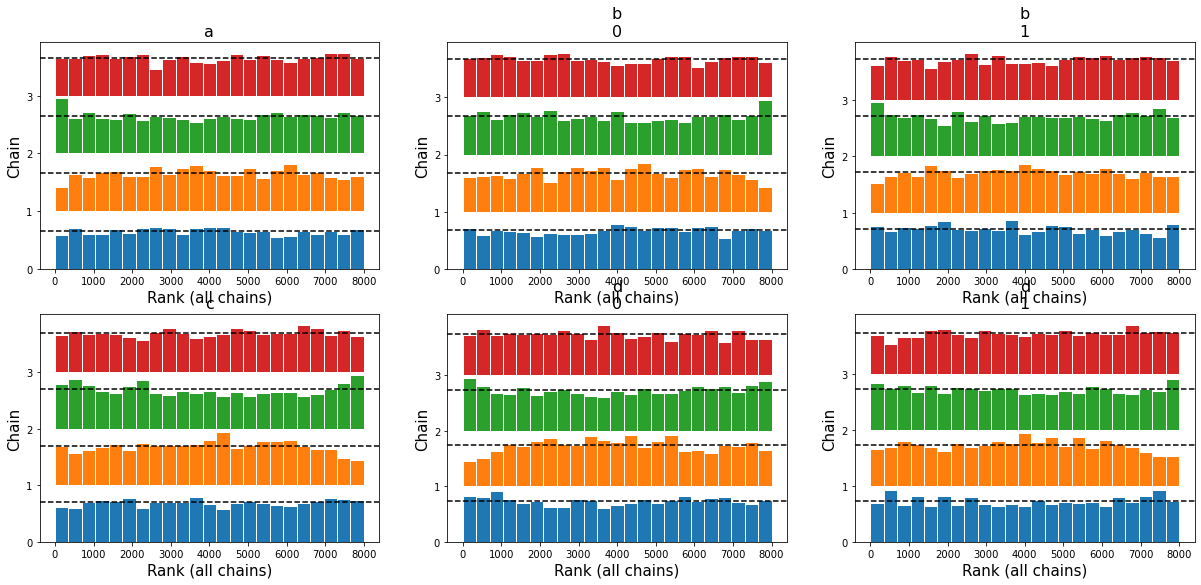

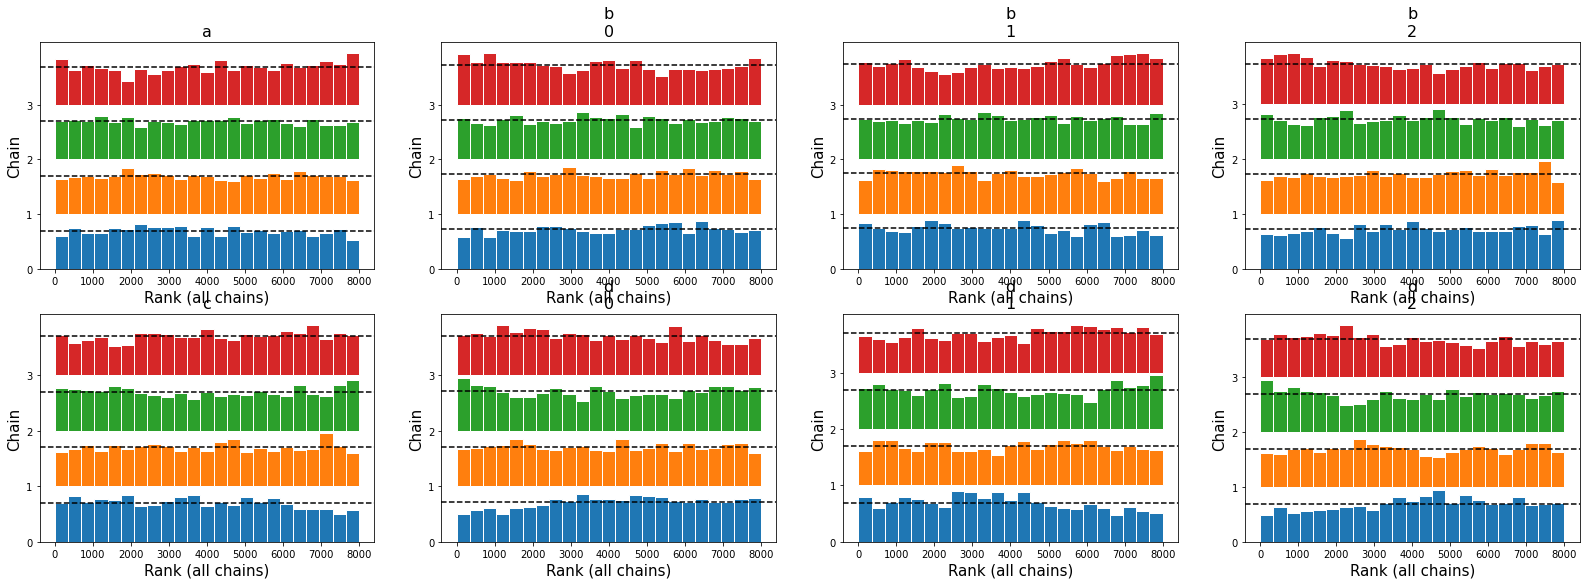

In [12]:
var_bar_mu_sigma = ['~mu', '~sigma']
for i in range(len(norm_inference_hetero)):
    display(az.summary(norm_inference_hetero[i], var_bar_mu_sigma))
    display(az.plot_rank(norm_inference_hetero[i], var_bar_mu_sigma))

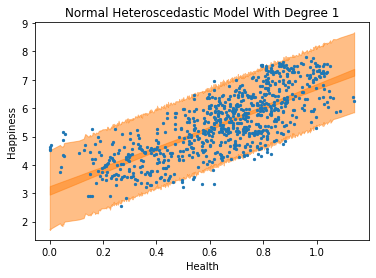

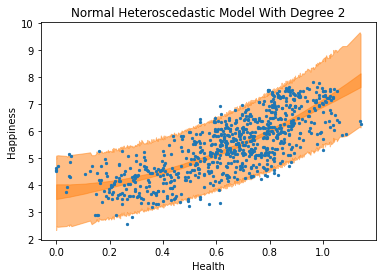

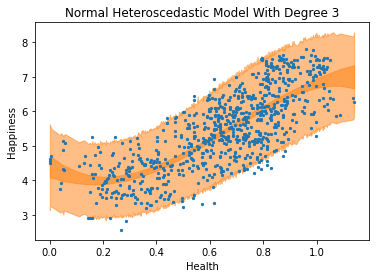

In [13]:
for i in range(len(norm_inference_hetero)):
    ax = az.plot_hdi(health, norm_inference_hetero[i].posterior['mu'], smooth = False)
    az.plot_hdi(health, norm_inference_hetero[i].posterior_predictive['likelihood'], ax = ax, smooth = False)
    plt.scatter(health, happiness, s = 5)
    plt.title(f'Normal Heteroscedastic Model With Degree {i+1}')
    plt.xlabel('Health')
    plt.ylabel('Happiness')
    plt.show()

### T Homoscedastic

In [14]:
t_inference = []

for degree in degrees:
    with pm.Model() as norm_model:
        
        x = pm.MutableData('x', health)
        y = pm.MutableData('y', happiness)

        # priors
        nu = pm.HalfNormal('nu', sigma = 30)
        a = pm.Normal('a', mu = 0, sigma = 5)
        b = pm.Normal('b', mu = 0, sigma = 5, shape = degree)
        sigma = pm.HalfNormal('sigma', sigma = 5)
        
        # deterministic mu for each degree 
        mu = a
        for i in range(0, degree):
            mu = mu + b[i] * x ** (i+1)
        mu = pm.Deterministic('mu', mu)

        # likelihood
        likelihood = pm.StudentT('likelihood', nu=nu, mu = mu, sigma = sigma, observed = y)

        # sampling
        inference = pm.sample(2000, tune = 2000, target_accept = 0.9)
        t_post = pm.sample_posterior_predictive(inference, extend_inferencedata = True)
        t_inference.append(t_post)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, a, b, sigma]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 52 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, a, b, sigma]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 110 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, a, b, sigma]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 330 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,3.098,0.077,2.950,3.237,0.001,0.001,4094.0,4140.0,1.0
b[0],3.664,0.113,3.455,3.880,0.002,0.001,4225.0,4351.0,1.0
nu,54.143,17.287,24.068,86.552,0.226,0.160,5396.0,4067.0,1.0
sigma,0.731,0.019,0.694,0.766,0.000,0.000,5717.0,4642.0,1.0


array([<AxesSubplot:title={'center':'a'}, xlabel='Rank (all chains)', ylabel='Chain'>,
       <AxesSubplot:title={'center':'b\n0'}, xlabel='Rank (all chains)', ylabel='Chain'>,
       <AxesSubplot:title={'center':'nu'}, xlabel='Rank (all chains)', ylabel='Chain'>,
       <AxesSubplot:title={'center':'sigma'}, xlabel='Rank (all chains)', ylabel='Chain'>],
      dtype=object)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,3.691,0.138,3.432,3.944,0.003,0.002,2921.0,4081.0,1.0
b[0],1.238,0.486,0.307,2.125,0.009,0.007,2707.0,3467.0,1.0
b[1],2.066,0.405,1.299,2.815,0.008,0.005,2840.0,3825.0,1.0
nu,54.708,17.470,24.512,87.883,0.268,0.190,4014.0,3663.0,1.0
sigma,0.720,0.019,0.684,0.756,0.000,0.000,4644.0,4399.0,1.0


array([[<AxesSubplot:title={'center':'a'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'b\n0'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'b\n1'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<AxesSubplot:title={'center':'nu'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'sigma'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:>]], dtype=object)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,4.322,0.183,3.975,4.672,0.004,0.002,2709.0,3214.0,1.0
b[0],-3.800,1.100,-5.884,-1.651,0.023,0.016,2331.0,2826.0,1.0
b[1],12.267,2.045,8.329,16.112,0.042,0.030,2377.0,2869.0,1.0
b[2],-5.943,1.164,-8.086,-3.652,0.023,0.016,2539.0,3138.0,1.0
nu,54.684,17.335,25.819,88.608,0.257,0.182,4289.0,4375.0,1.0
sigma,0.705,0.019,0.671,0.742,0.000,0.000,4064.0,4020.0,1.0


array([[<AxesSubplot:title={'center':'a'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'b\n0'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'b\n1'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<AxesSubplot:title={'center':'b\n2'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'nu'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'sigma'}, xlabel='Rank (all chains)', ylabel='Chain'>]],
      dtype=object)

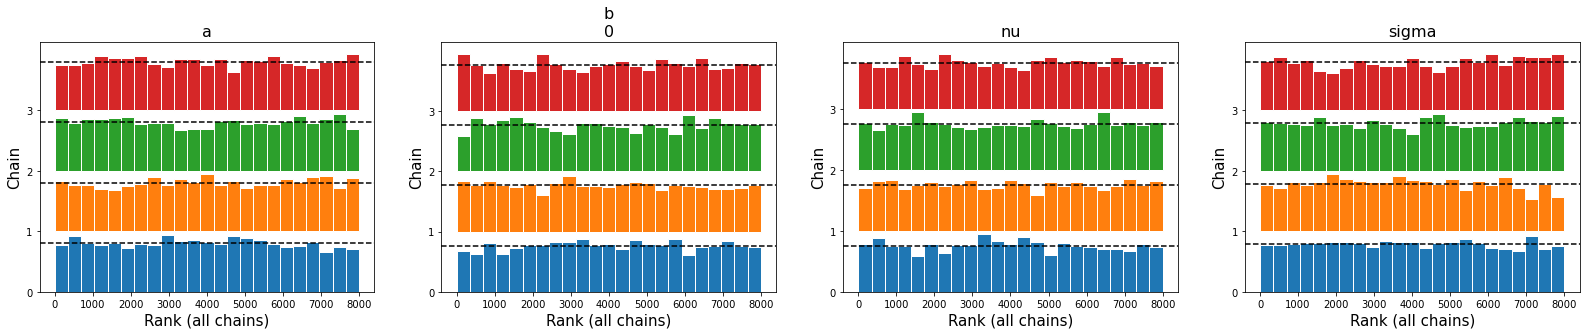

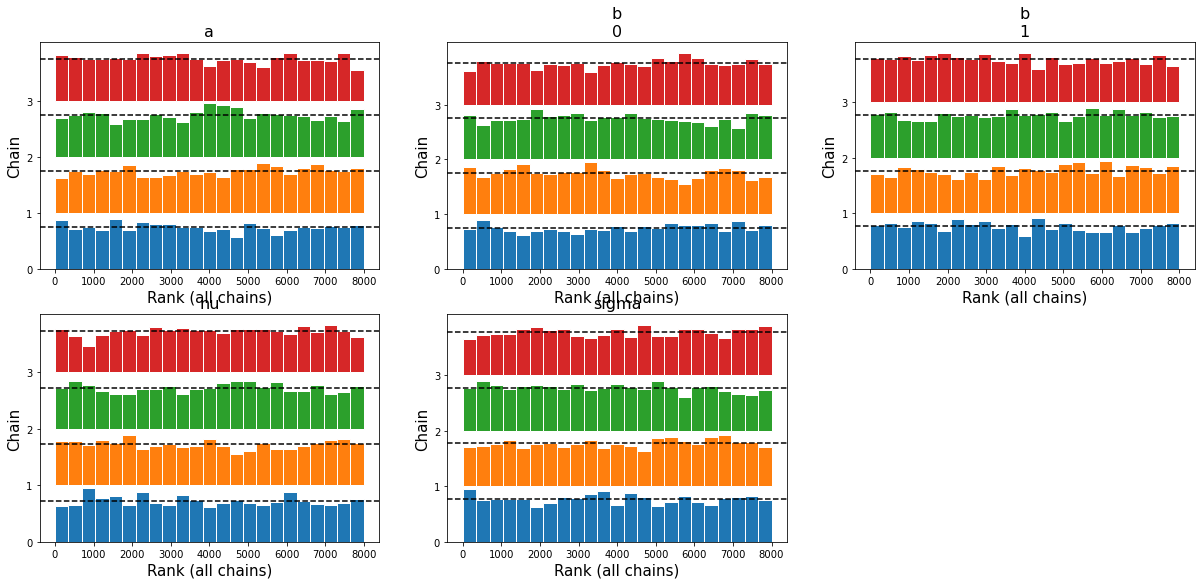

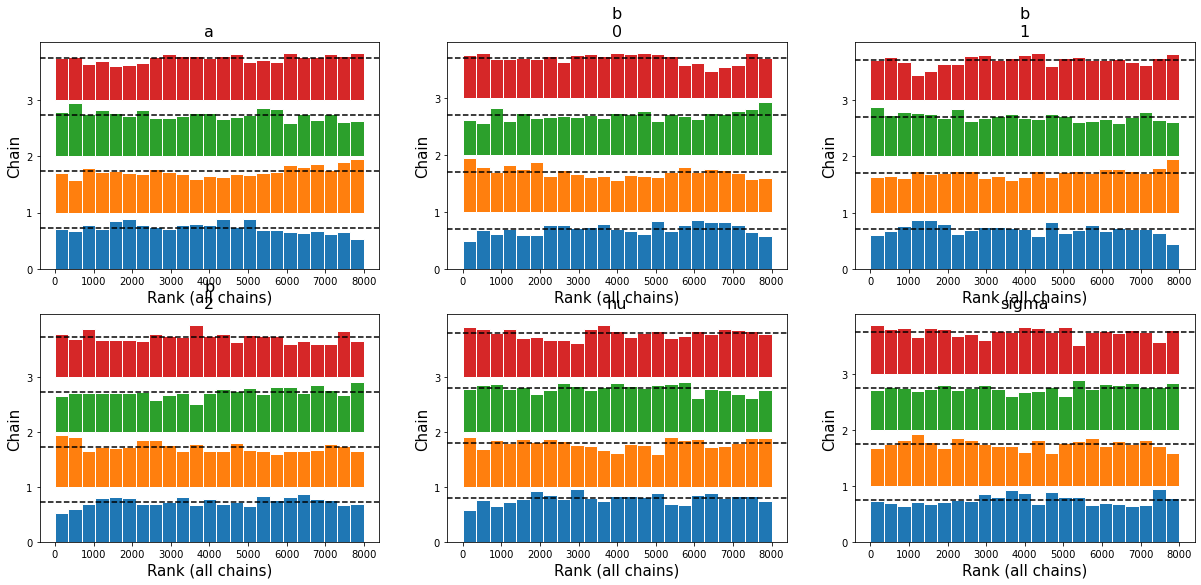

In [15]:
for i in range(len(t_inference)):
    display(az.summary(t_inference[i], var_bar_mu))
    display(az.plot_rank(t_inference[i], var_bar_mu))

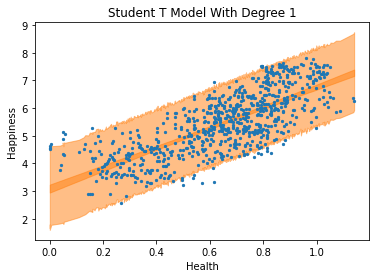

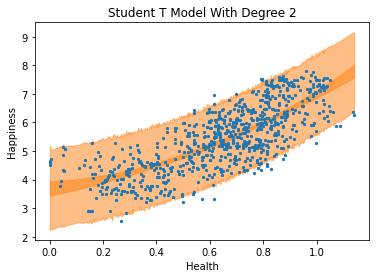

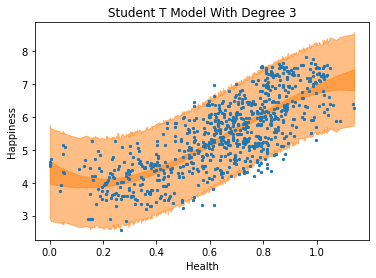

In [16]:
for i in range(len(t_inference)):
    ax = az.plot_hdi(health, t_inference[i].posterior['mu'], smooth=False)
    az.plot_hdi(health, t_inference[i].posterior_predictive['likelihood'], ax=ax, smooth=False)
    plt.scatter(health, happiness, s = 5)
    plt.title(f'Student T Model With Degree {i+1}')
    plt.xlabel('Health')
    plt.ylabel('Happiness')
    plt.show()

### T Heteroscedastic

In [17]:
t_inference_hetero = []

for degree in degrees:
    with pm.Model() as norm_model:
        
        x = pm.MutableData('x', health)
        y = pm.MutableData('y', happiness)

        # priors
        nu = pm.HalfNormal('nu', sigma = 30)
        a = pm.Normal('a', mu = 0, sigma = 5)
        b = pm.Normal('b', mu = 0, sigma = 5, shape = degree)
        c = pm.Normal('c', sigma = 5)
        d = pm.Normal('d', sigma = 5, shape = degree)
        
        # deterministic mu and sigma for each degree
        mu = a
        sigma = c
        
        for i in range(0, degree):
            mu = mu + b[i] * x ** (i+1)
            sigma = sigma + d[i] * x ** (i+1)
            
        mu = pm.Deterministic('mu', mu)
        sigma = pm.Deterministic('sigma', sigma)

        # likelihood
        likelihood = pm.StudentT('likelihood', nu=nu, mu = mu, sigma = sigma, observed = y)

        # sampling
        inference = pm.sample(2000, tune = 2000, target_accept = 0.9)
        t_post = pm.sample_posterior_predictive(inference, extend_inferencedata = True)
        t_inference_hetero.append(t_post)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, a, b, c, d]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 74 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, a, b, c, d]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 188 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, a, b, c, d]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 619 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,3.103,0.082,2.942,3.252,0.001,0.001,4294.0,4171.0,1.0
b[0],3.654,0.120,3.423,3.873,0.002,0.001,4341.0,4288.0,1.0
c,0.721,0.053,0.623,0.820,0.001,0.001,4127.0,4009.0,1.0
d[0],0.017,0.076,-0.126,0.159,0.001,0.001,4087.0,4169.0,1.0
nu,54.111,17.219,25.513,87.896,0.232,0.164,5261.0,4164.0,1.0


array([[<AxesSubplot:title={'center':'a'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'b\n0'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'c'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<AxesSubplot:title={'center':'d\n0'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'nu'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:>]], dtype=object)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,3.756,0.145,3.489,4.036,0.003,0.002,2536.0,2781.0,1.0
b[0],0.900,0.527,-0.112,1.876,0.011,0.008,2419.0,2602.0,1.0
b[1],2.394,0.447,1.553,3.231,0.009,0.006,2600.0,3005.0,1.0
c,0.667,0.092,0.498,0.839,0.002,0.001,2414.0,3303.0,1.0
d[0],-0.145,0.333,-0.783,0.443,0.007,0.005,2343.0,2975.0,1.0
d[1],0.310,0.288,-0.217,0.857,0.006,0.004,2585.0,3202.0,1.0
nu,54.621,17.308,24.421,86.795,0.246,0.175,4838.0,4602.0,1.0


array([[<AxesSubplot:title={'center':'a'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'b\n0'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'b\n1'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<AxesSubplot:title={'center':'c'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'d\n0'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'d\n1'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<AxesSubplot:title={'center':'nu'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,4.426,0.162,4.116,4.722,0.003,0.002,2645.0,2927.0,1.0
b[0],-4.577,1.003,-6.380,-2.621,0.021,0.015,2363.0,2591.0,1.0
b[1],13.807,1.911,10.218,17.385,0.039,0.027,2452.0,2849.0,1.0
b[2],-6.840,1.117,-9.043,-4.854,0.022,0.015,2634.0,3126.0,1.0
c,0.573,0.135,0.332,0.827,0.003,0.002,2560.0,2786.0,1.0
d[0],-0.369,0.852,-2.018,1.125,0.018,0.013,2365.0,2329.0,1.0
d[1],1.746,1.586,-1.147,4.665,0.033,0.025,2389.0,2681.0,1.0
d[2],-1.239,0.898,-2.891,0.418,0.018,0.013,2492.0,2678.0,1.0
nu,54.277,16.893,25.297,86.573,0.253,0.179,4185.0,3996.0,1.0


array([[<AxesSubplot:title={'center':'a'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'b\n0'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'b\n1'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<AxesSubplot:title={'center':'b\n2'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'c'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'d\n0'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<AxesSubplot:title={'center':'d\n1'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'d\n2'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <AxesSubplot:title={'center':'nu'}, xlabel='Rank (all chains)', ylabel='Chain'>]],
      dtype=object)

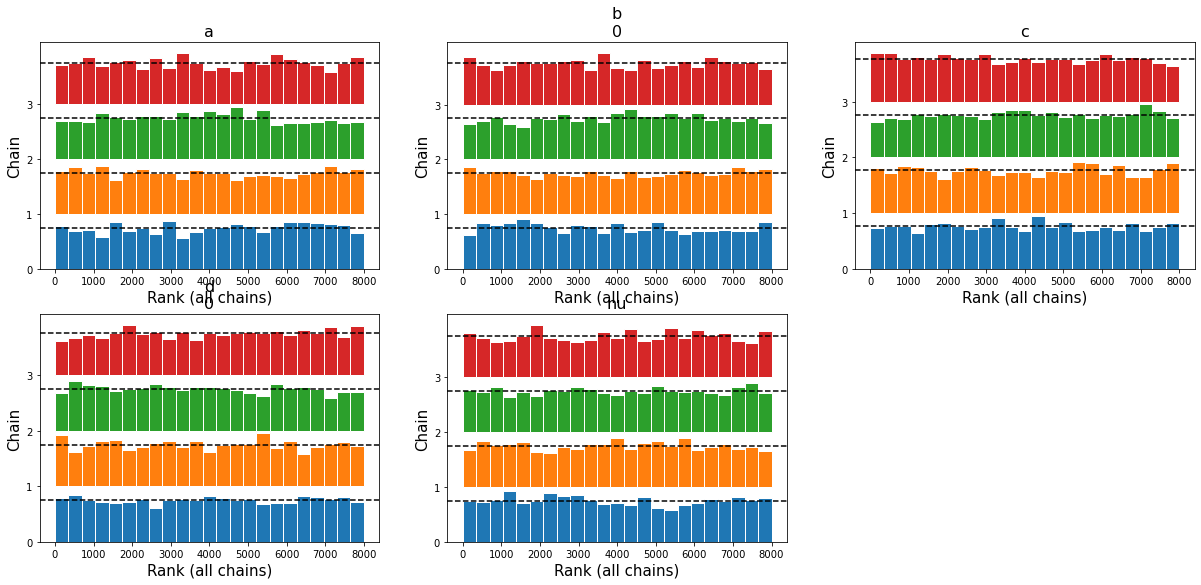

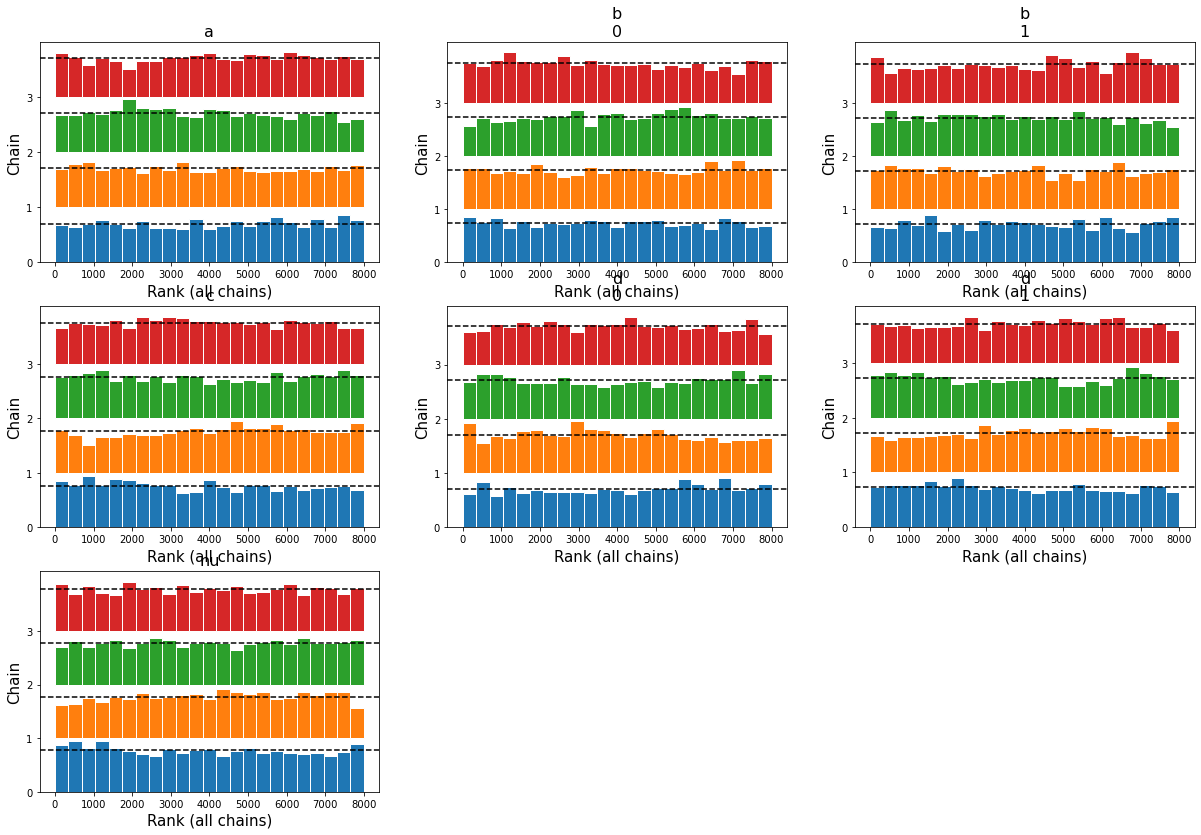

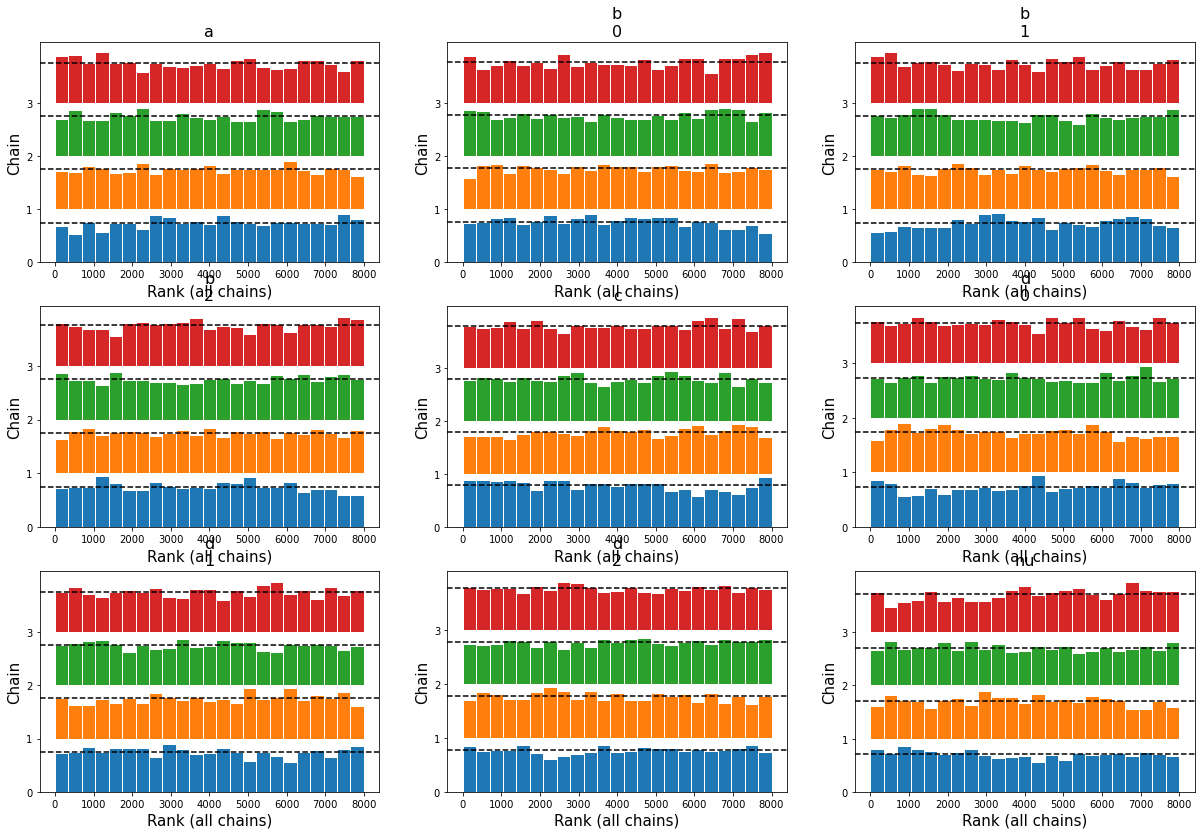

In [18]:
for i in range(len(t_inference_hetero)):
    display(az.summary(t_inference_hetero[i], var_bar_mu_sigma))
    display(az.plot_rank(t_inference_hetero[i], var_bar_mu_sigma))

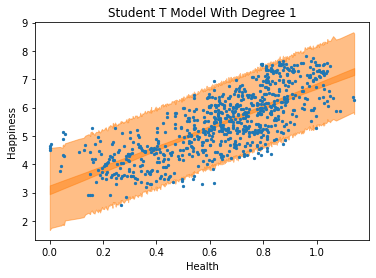

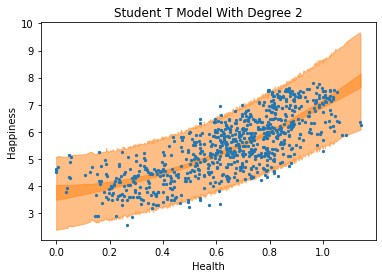

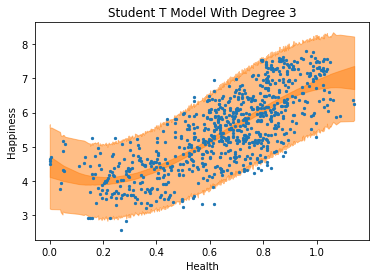

In [19]:
for i in range(len(t_inference_hetero)):
    ax = az.plot_hdi(health, t_inference_hetero[i].posterior['mu'], smooth=False)
    az.plot_hdi(health, t_inference_hetero[i].posterior_predictive['likelihood'], ax=ax, smooth=False)
    plt.scatter(health, happiness, s = 5)
    plt.title(f'Student T Model With Degree {i+1}')
    plt.xlabel('Health')
    plt.ylabel('Happiness')
    plt.show()

### Model Comparison

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
Normal Cubic Heteroscedastic,0,1705.842816,6.413011,0.000000,1.000000e+00,33.355973,0.000000,False,deviance
T Cubic Heteroscedastic,1,1710.973269,6.469375,5.130453,1.138692e-10,33.621812,0.643402,False,deviance
Normal Cubic,2,1718.725534,4.007648,12.882718,8.783492e-11,33.260189,6.287950,False,deviance
T Cubic,3,1723.485577,4.007677,17.642761,8.023922e-11,33.542236,6.234290,False,deviance
Normal Quadratic Heteroscedastic,4,1747.199621,5.268361,41.356805,3.809338e-11,33.045762,9.640972,False,deviance
Normal Quadratic,5,1750.943290,3.850547,45.100473,3.081564e-11,32.923159,11.249515,False,deviance
T Quadratic Heteroscedastic,6,1752.294103,5.205547,46.451287,3.017260e-11,33.336250,9.690650,False,deviance
T Quadratic,7,1756.268574,3.917500,50.425758,2.265861e-11,33.241539,11.292729,False,deviance
Normal Linear,8,1774.062139,2.749394,68.219322,1.066332e-11,33.215823,15.807942,False,deviance
Normal Linear Heteroscedastic,9,1775.984161,3.589327,70.141345,8.704884e-12,33.249269,16.021824,False,deviance


<AxesSubplot:xlabel='Deviance'>

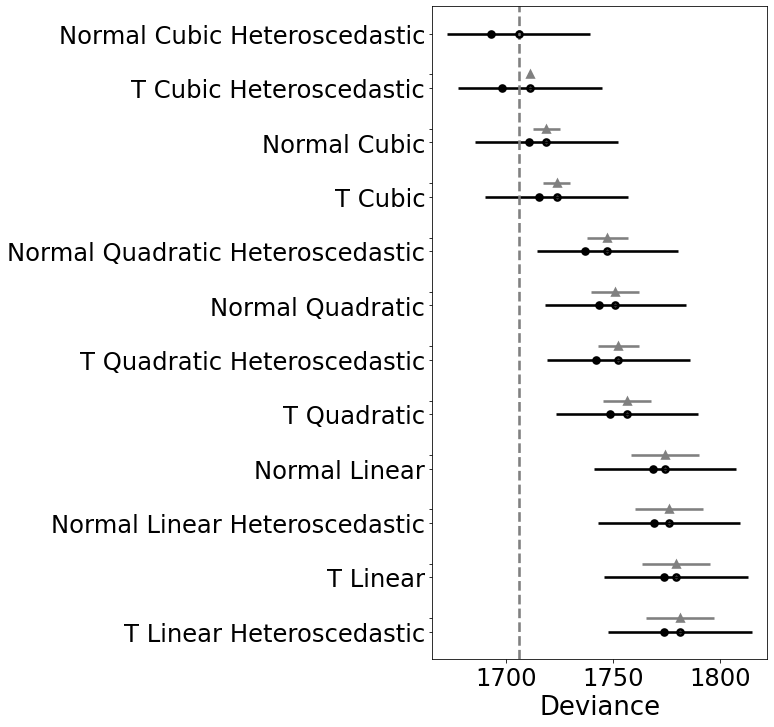

In [20]:
models = {'Normal Linear': norm_inference[0], 'Normal Quadratic': norm_inference[1], 
          'Normal Cubic': norm_inference[2], 'Normal Linear Heteroscedastic': norm_inference_hetero[0], 
          'Normal Quadratic Heteroscedastic': norm_inference_hetero[1], 
          'Normal Cubic Heteroscedastic': norm_inference_hetero[2],
          'T Linear': t_inference[0], 'T Quadratic': t_inference[1], 'T Cubic': t_inference[2],
          'T Linear Heteroscedastic': t_inference_hetero[0], 
          'T Quadratic Heteroscedastic': t_inference_hetero[1], 'T Cubic Heteroscedastic': t_inference_hetero[2]}
comparison = az.compare(models, ic='loo', scale='deviance')
display(comparison)
display(az.plot_compare(comparison))